# Assignment Part 2

In [1]:
from urllib.request import urlopen
import requests
import numpy as np
import pandas as pd
import cv2
import json
import sys
from matplotlib.pyplot import figure
import seaborn as sns


## 1. Annotation

In [2]:
# URL to image using opencv
image_url = 'http://images.cocodataset.org/val2017/000000184791.jpg'

resp = urlopen(image_url)

image = np.asarray(bytearray(resp.read()), dtype='uint8')

image = cv2.imdecode(image, cv2.IMREAD_COLOR)


In [3]:
# Objects cordinates
bowl_coor1 = (120, 300)

bowl_coor2 = (300, 400)

candle_coor1 = (340, 70)

candle_coor2 = (460, 300)
  
# Creating bounding boxes
cv2.rectangle(image ,bowl_coor1 ,bowl_coor2, (255, 0, 0), 2) 

cv2.rectangle(image, candle_coor1, candle_coor2, (0,255 , 0), 2)


array([[[221, 215, 210],
        [220, 214, 209],
        [220, 214, 209],
        ...,
        [194, 197, 188],
        [194, 197, 188],
        [194, 197, 188]],

       [[222, 216, 211],
        [222, 216, 211],
        [221, 215, 210],
        ...,
        [195, 198, 189],
        [194, 197, 188],
        [194, 197, 188]],

       [[222, 216, 211],
        [222, 216, 211],
        [222, 216, 211],
        ...,
        [195, 198, 189],
        [194, 197, 188],
        [194, 197, 188]],

       ...,

       [[219, 209, 202],
        [219, 210, 201],
        [219, 210, 200],
        ...,
        [193, 194, 185],
        [192, 192, 186],
        [192, 192, 186]],

       [[219, 209, 202],
        [219, 210, 201],
        [219, 210, 200],
        ...,
        [193, 193, 187],
        [192, 192, 186],
        [192, 192, 186]],

       [[219, 209, 202],
        [219, 210, 201],
        [219, 210, 200],
        ...,
        [193, 193, 187],
        [192, 192, 186],
        [192, 192, 186]]

In [4]:
# Viewing the image
cv2.imshow('image',image)

cv2.waitKey(0)


-1

In [5]:
anot_json = {
  "image_name": "image1.jpg",
  "annotations": [
    {
      "label": "bowl",
      "coordinates": {
        "x_min": 120,
        "y_min": 300,
        "x_max": 300,
        "y_max": 400
      }
    },
    {
      "label": "candle",
      "coordinates": {
        "x_min": 70,
        "y_min": 300,
        "x_max": 340,
        "y_max": 460
      }
    }
  ]
}

# Saving json file
with open('annotation.json', 'w') as f:
    json.dump(anot_json, f, indent= 2)


## 2. Scripting

### 2.1. Output a CSV file with normalized coordinates of the bounding boxes.

In [6]:
with open('annotation.json') as f:
    data = json.load(f)

def normalized_coord(image, file):
    x = image.shape[0]
    y = image.shape[1]
    
    for annot in file['annotations']:
        annot['coordinates']['x_min'] = annot['coordinates']['x_min'] / x
        annot['coordinates']['x_max'] = annot['coordinates']['x_max'] / x
        annot['coordinates']['y_min'] = annot['coordinates']['y_min'] / y
        annot['coordinates']['y_max'] = annot['coordinates']['y_max'] / y
        
normalized_coord(image, data)

# Settimg up a df and saving as csv

normed_coords = pd.json_normalize(data['annotations']).set_index('label')

normed_coords.to_csv('normed_coords.csv', sep=',')


<Axes: xlabel='label'>

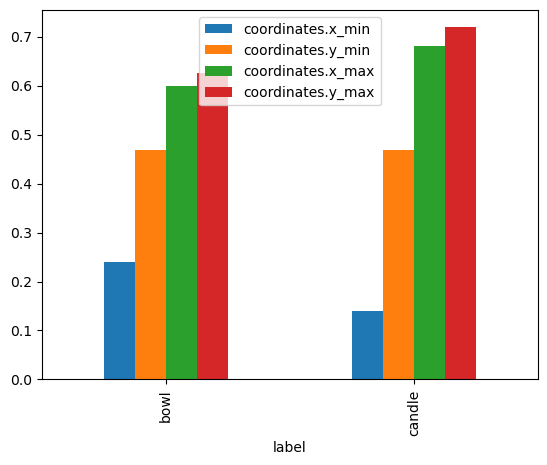

In [7]:
# Visualize the output
vis_data1 = pd.read_csv('normed_coords.csv')

vis_data1.set_index('label').plot(kind='bar')


### 2.2. Output another JSON file that converts the bounding box coordinates to x_min, y_min, width, height.

In [8]:
with open('annotation.json') as f:
    data = json.load(f)

# Creating width and height keys
for annot in data['annotations']:
    annot['coordinates']['width'] = annot['coordinates']['x_max'] - annot['coordinates']['x_min']
    annot['coordinates']['height'] = annot['coordinates']['y_max'] - annot['coordinates']['y_min'] 

# Deleting x_man and y_max
for item in data['annotations']:
    del item['coordinates']['x_max']
    del item['coordinates']['y_max']

# Saving to a new json file
with open('wh_annotation.json', 'w') as f:
    json.dump(data, f, indent = 2)


<Axes: >

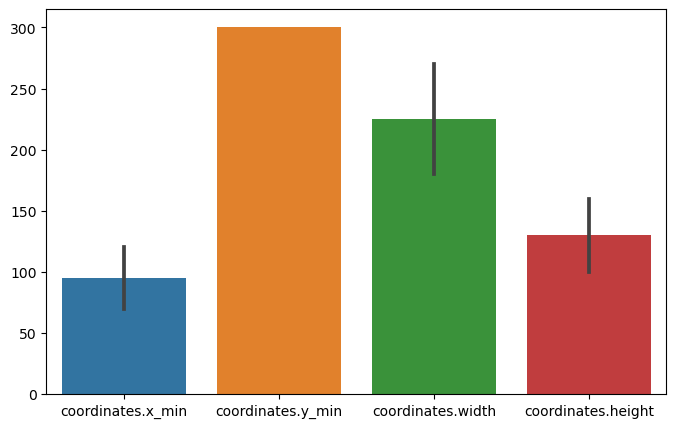

In [9]:
# Fetching visualization data and plotting
with open('wh_annotation.json') as f:
    data = json.load(f)

vis_data2 = pd.json_normalize(data['annotations']).set_index('label')

figure(figsize=(8,5))

sns.barplot(vis_data2)
